In [8]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [3]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\archive (5)\emails.csv")
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [19]:
x=data['text']
y=data['spam']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=44)
vectorizer=CountVectorizer()
xtrain_count=vectorizer.fit_transform(xtrain)
xtest_count=vectorizer.transform(xtest)
model=MultinomialNB()
p=model.fit(xtrain_count,ytrain)
xt=p.predict(xtest_count)
print('accuracy score:',accuracy_score(ytest,xt)*100)

accuracy score: 98.95287958115183


In [20]:
print(classification_report(ytest,xt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1316
           1       0.98      0.98      0.98       403

    accuracy                           0.99      1719
   macro avg       0.99      0.98      0.99      1719
weighted avg       0.99      0.99      0.99      1719



In [21]:
new_m=['receipts from joseph , please call him']
new_c=vectorizer.transform(new_m)
xt1=p.predict(new_c)
if xt1==0:
    print("its not spam")
else:
    print("its spam")

its not spam


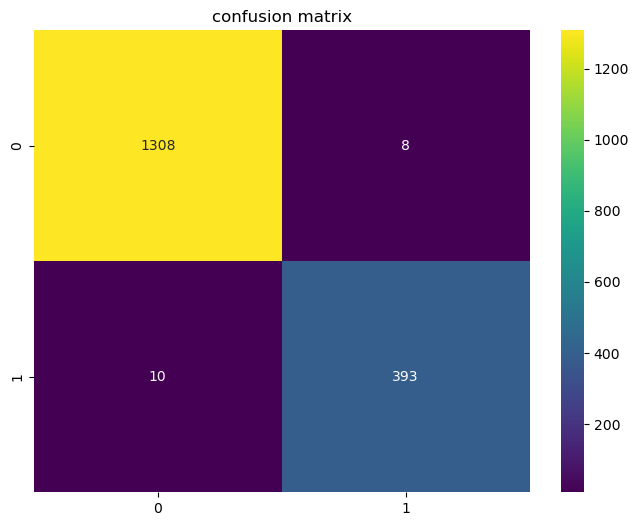

In [22]:
conf_matrix=confusion_matrix(ytest,xt)
plt.figure(figsize=(8,6))
sn.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title("confusion matrix")
plt.show()

<Axes: xlabel='spam'>

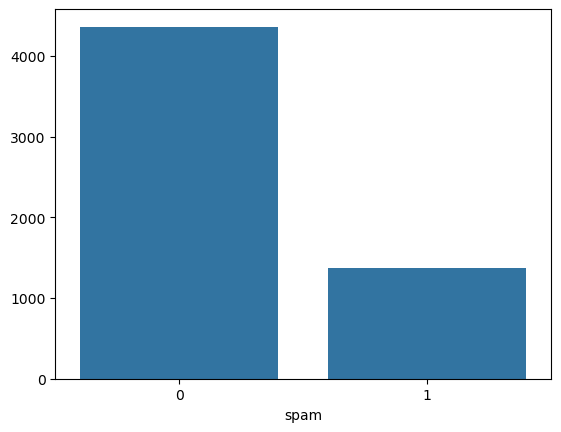

In [23]:
label=data['spam'].value_counts()
sn.barplot(x=label.index,y=label.values)